# **INFORMACION GENERAL**
## Características del trabajo
Las variables seleccionadas son:

* Semana epidemiológica
* Año epidemiológica, tener en cuenta que la mayoría de filas son del 2022 y la minoría de 2023.
* Departamento
* Municipio
* Sexo
* Edad
* Fecha de inicio de síntomas (modificar datos)
* Fecha de exantema (modificar datos)
* Hospitalización
* Fuente de infección
* Tipo de seguridad social

## Fuentes
Esta base de datos se encontro en Casos positivos de Viruela símica en Colombia en:

*El Instituto Nacional de Salud Publicó el Conjunto de Datos de Viruela Símica en Colombia | Datos Abiertos. (s. f.). https://herramientas.datos.gov.co/noticias/el-instituto-nacional-de-salud-publico-el-conjunto-de-datos-de-viruela-simica-en-colombia*

# **CONTENIDO**

## **Importación y filtrado**
Importamos el conjunto de datos.

In [1]:
import pandas as pd
datos = pd.read_csv('./Casos_positivos_de_Viruela_s_mica_en_Colombia.csv')

Descartamos las columnas que no vamos a utilizar y limpiamos de nulos nuestra tabla de datos.

In [2]:
datos = datos.drop(columns=[
    'Código DIVIPOLA departamento',
    'Código DIVIPOLA municipio',
    'Fecha notificación',
    'Fecha diagnóstico',
    'Unidad de medida',
    'Condición final',
    '¿Viajó?',
    'País de viaje',
    'Fecha de terminación del seguimiento',
    'Pertenencia étnica',
    'Nombre grupo étnico',
    'Estrato'
])

filas_totales = len(datos.index)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Semana epidemiológica        4089 non-null   int64 
 1   Año epidemiológico           4089 non-null   int64 
 2   Departamento                 4089 non-null   object
 3   Municipio                    4089 non-null   object
 4   Sexo                         4089 non-null   object
 5   Edad                         4089 non-null   int64 
 6   Fecha de inicio de síntomas  4089 non-null   object
 7   Fecha de exantema            4089 non-null   object
 8   Hospitalización              4089 non-null   int64 
 9   Vínculo epidemiológico       4089 non-null   int64 
 10  Fuente de infección          4089 non-null   object
 11  Tipo de seguridad social     4089 non-null   object
dtypes: int64(5), object(7)
memory usage: 383.5+ KB


Como vemos no tenemos filas con valores nulos en las columnas que vamos a utilizar para nuestro análisis, por lo tanto, el conjunto de datos está listo para ser tratado.

## **Análisis**
### **Medidas de tendencia central**

Aquí va lo que ya hizo Karen.

### **Clases**
Para nuestro caso nos enfocamos en dos variables para hacer clases:
+ Edad
+ Sexo

En la variable 'Edad' utilizamos los grupos etarios que propone el *Ministerio de Salud y Protección Social de Colombia*, quedando así:
1. Primera infancia: 0 a 5 años.
2. Infancia: 6 a 11 años.
3. Adolescencia: 12 a 17 años.
4. Adulto: 18 a 59 años.
5. Adulto mayor: 60 años o más.

In [3]:
primera_infancia = datos[(datos['Edad'] >= 0) & (datos['Edad'] < 6)]
infancia = datos[(datos['Edad'] >= 6) & (datos['Edad'] < 12)]
adolescencia = datos[(datos['Edad'] >= 12) & (datos['Edad'] < 18)]
adulto = datos[(datos['Edad'] >= 18) & (datos['Edad'] < 60)]
adulto_mayor = datos[(datos['Edad'] >= 60)]

Con los conjuntos separados calculamos las frencuencias absolutas y relativas.

In [4]:
# fa = frecuencia absoluta
fa_primera_infancia = len(primera_infancia.index)
fa_infancia = len(infancia.index)
fa_adolescencia = len(adolescencia.index)
fa_adulto = len(adulto.index)
fa_adulto_mayor = len(adulto_mayor.index)

# fr = frecuencia relativa
fr_primera_infancia = fa_primera_infancia / filas_totales
fr_infancia = fa_infancia / filas_totales
fr_adolescencia = fa_adolescencia / filas_totales
fr_adulto = fa_adulto / filas_totales
fr_adulto_mayor = fa_adulto_mayor / filas_totales

# Esta sección aún está en trabajo...
print(
    fr_primera_infancia,
    fr_infancia,
    fr_adolescencia,
    fr_adulto,
    fr_adulto_mayor
)

0.001222792858889704 0.0019564685742235266 0.006358522866226461 0.9843482514062117 0.006113964294448521


Tomando en cuenta el orden de los grupos etarios que se sugirio, quedaría las frecuencias absolutas acumuladas y frecuencias relativas acumuladas así:

In [5]:
#faa = frecuencia absoluta acumulada
faa1 = fa_primera_infancia
faa2 = faa1 + fa_infancia 
faa3 = faa2 + fa_adolescencia
faa4 = faa3 + fa_adulto
faa5 = faa4 + fa_adulto_mayor

#fra = frecuencia relativa acumulada
fra1 = fr_primera_infancia
fra2 = fra1 + fr_infancia 
fra3 = fra2 + fr_adolescencia
fra4 = fra3 + fr_adulto
fra5 = fra4 + fr_adulto_mayor

## Gráficos

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [7]:
datos.head()

,Semana epidemiológica,Año epidemiológico,Departamento,Municipio,Sexo,Edad,Fecha de inicio de síntomas,Fecha de exantema,Hospitalización,Vínculo epidemiológico,Fuente de infección,Tipo de seguridad social
0,37,2022,ANTIOQUIA,BELLO,M,18,2022-09-15T00:00:00.000,2022-09-15T00:00:00.000,2,2,FUENTE DESCONOCIDA,C
1,37,2022,BOGOTA,BOGOTA,M,30,2022-09-13T00:00:00.000,2022-09-13T00:00:00.000,2,2,FUENTE DESCONOCIDA,C
2,37,2022,ANTIOQUIA,MEDELLIN,M,37,2022-09-17T00:00:00.000,2022-09-17T00:00:00.000,2,2,RELACIONADO CON FUENTE DESCONOCIDA,S
3,33,2022,ANTIOQUIA,MEDELLIN,M,26,2022-08-20T00:00:00.000,2022-08-20T00:00:00.000,2,2,FUENTE DESCONOCIDA,S
4,37,2022,ANTIOQUIA,MEDELLIN,M,37,2022-09-17T00:00:00.000,2022-09-17T00:00:00.000,2,2,FUENTE DESCONOCIDA,C


In [46]:
frecuencias = [fa_primera_infancia, fa_infancia, fa_adolescencia, fa_adulto, fa_adulto_mayor]
frecuencias_a = [faa1, faa2, faa3, faa4, faa5]
frecuencias_r = [fr_primera_infancia, fr_infancia, fr_adolescencia, fr_adulto, fr_adulto_mayor]
frecuencias_ra = [fra1, fra2, fra3, fra4, fra5]
df = pd.DataFrame({'clase': ['primera infancia', 'infancia', 'adolescencia', 'adulto', 'adulto mayor'], 'frecuencia':frecuencias, 'F_Acumuladas':frecuencias_a, 'F_Relativas': frecuencias_r, 'F_Relativo_Acumulado': frecuencias_ra})
df.head()

,clase,frecuencia,F_Acumuladas,F_Relativas,F_Relativo_Acumulado
0,primera infancia,5,5,0.001223,0.001223
1,infancia,8,13,0.001956,0.003179
2,adolescencia,26,39,0.006359,0.009538
3,adulto,4025,4064,0.984348,0.993886
4,adulto mayor,25,4089,0.006114,1.000000


<Axes: xlabel='clase', ylabel='frecuencia'>

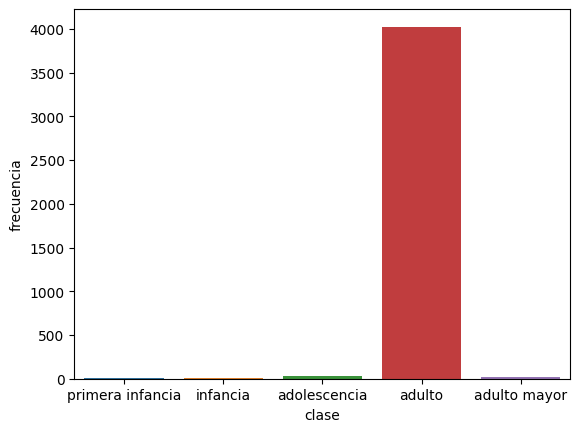

In [12]:
plt.figure()
sns.barplot(data=df, x='clase', y='frecuencia')

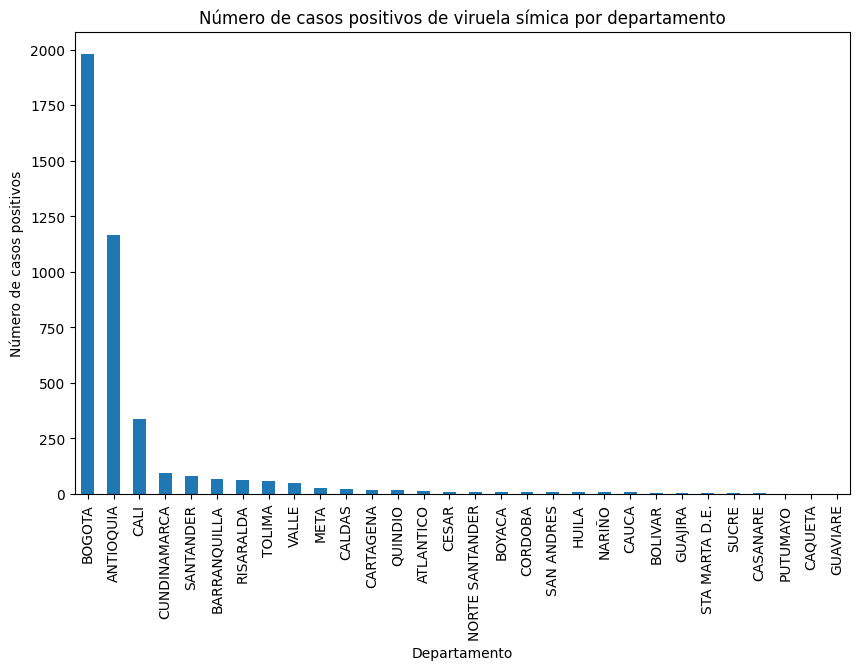

In [ ]:
# Agrupar los datos por departamento y contar el número de casos positivos en cada departamento
por_departamento = df['Departamento'].value_counts().sort_values(ascending=False)

# Crear un gráfico de barras con el número de casos positivos por departamento
plt.figure(figsize=(10, 6))
por_departamento.plot(kind='bar')
plt.xlabel('Departamento')
plt.ylabel('Número de casos positivos')
plt.title('Número de casos positivos de viruela símica por departamento')
plt.show()

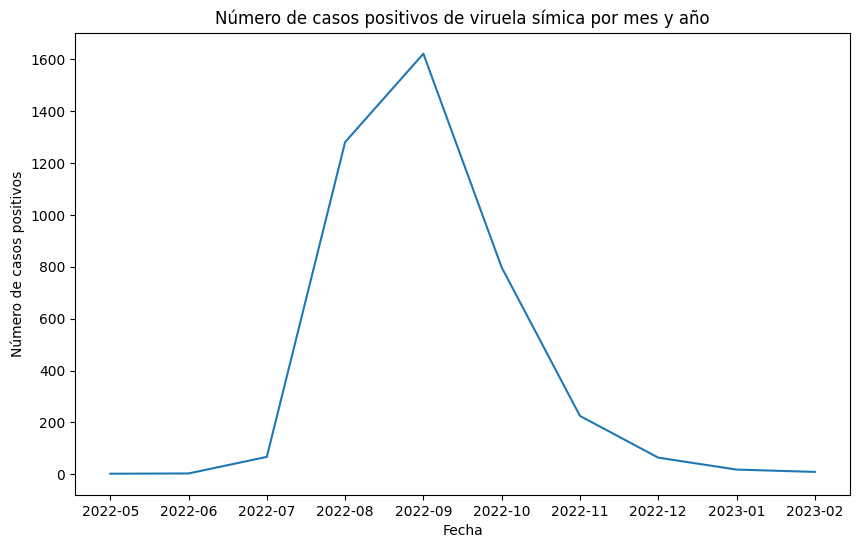

In [51]:

df = pd.read_csv('./Casos_positivos_de_Viruela_s_mica_en_Colombia.csv')

df['Fecha de inicio de síntomas'] = pd.to_datetime(df['Fecha de inicio de síntomas'])

df['Mes'] = df['Fecha de inicio de síntomas'].dt.month

df['Año'] = df['Fecha de inicio de síntomas'].dt.year

por_mes_y_anio = df.groupby(['Año', 'Mes'])['Fecha de inicio de síntomas'].count()

por_mes_y_anio = por_mes_y_anio.reset_index()

por_mes_y_anio['Fecha'] = por_mes_y_anio['Año'].astype(str) + '-' + por_mes_y_anio['Mes'].astype(str).str.zfill(2)

por_mes_y_anio = por_mes_y_anio.set_index(pd.to_datetime(por_mes_y_anio['Fecha'], format='%Y-%m'))
por_mes_y_anio = por_mes_y_anio.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(por_mes_y_anio['Fecha'], por_mes_y_anio['Fecha de inicio de síntomas'])
plt.xlabel('Fecha')
plt.ylabel('Número de casos positivos')
plt.title('Número de casos positivos de viruela símica por mes y año')
plt.show()

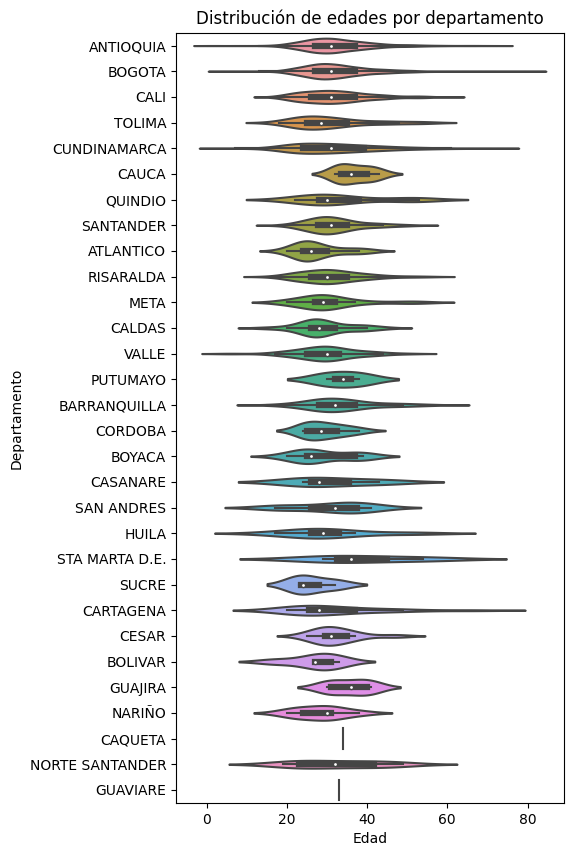

In [74]:
# Crear el gráfico de caja y bigotes horizontal con Seaborn
plt.figure(figsize=(5,10))
sns.violinplot(x='Edad', y='Departamento', data=df, orient='h')

# Agregar el título del gráfico y los títulos de los ejes
plt.xlabel('Edad')
plt.ylabel('Departamento')
plt.title('Distribución de edades por departamento')

# Mostrar la gráfica
plt.show()

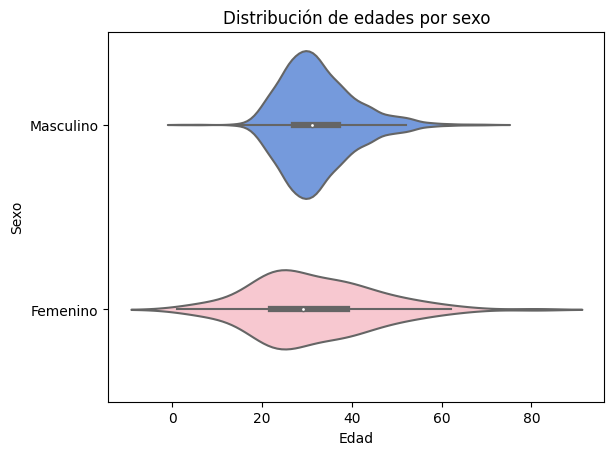

In [56]:
# Definir el diccionario para mapear los valores de "Sexo" a valores numéricos
sex_map = {'F': 'Femenino', 'M': 'Masculino'}

# Crear una nueva columna "Sexo_txt" con los valores de texto correspondientes
df['Sexo_txt'] = df['Sexo'].map(sex_map)

# Definir los colores para cada sexo
colors = {"Femenino": "#FFC0CB", "Masculino": "#6495ED"}

# Crear el gráfico de caja de violín horizontal
sns.violinplot(x='Edad', y='Sexo_txt', data=df, orient='h', palette=colors)

# Agregar el título del gráfico y los títulos de los ejes
plt.xlabel('Edad')
plt.ylabel('Sexo')
plt.title('Distribución de edades por sexo')

# Mostrar la gráfica
plt.show()

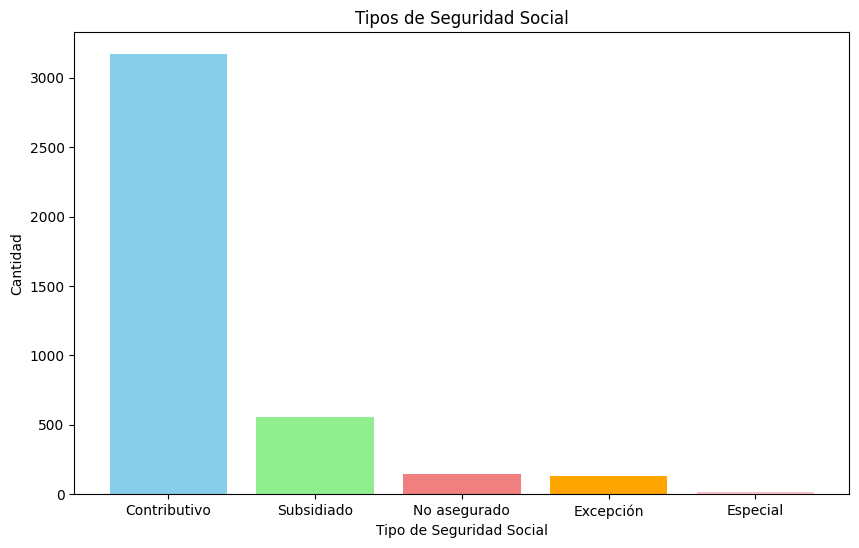

In [71]:
# Leer el archivo CSV
df = pd.read_csv('./Casos_positivos_de_Viruela_s_mica_en_Colombia.csv')

# Mapear los códigos a los nombres correspondientes
tipo_ss_nombres = {
    'C': 'Contributivo',
    'P': 'Excepción',
    'N': 'No asegurado',
    'S': 'Subsidiado',
    'E': 'Especial'
}

# Reemplazar los códigos por los nombres de los tipos de seguridad social
df['Tipo de seguridad social'] = df['Tipo de seguridad social'].map(tipo_ss_nombres)

# Contar los valores de cada tipo de seguridad social
conteo_tipo_ss = df['Tipo de seguridad social'].value_counts()

# Obtener los nombres y los valores de conteo
nombres = conteo_tipo_ss.index
valores = conteo_tipo_ss.values

# Crear una lista de colores para las barras
colores = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'pink']

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres, valores, color=colores)



# Agregar título y etiquetas de los ejes
plt.title('Tipos de Seguridad Social')
plt.xlabel('Tipo de Seguridad Social')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


La gráfica de barras por tipos de seguridad social muestra la cantidad de casos positivos de viruela símica en Colombia clasificados según el tipo de seguridad social. Cada barra representa un tipo de seguridad social y su altura indica la cantidad de casos positivos asociados a ese tipo. Además el se observa que el contributivo es la mayoría.